<a href="https://colab.research.google.com/github/Python-Charmer/Final-Project-Team-Python-Charmer/blob/master/FinalProject_Mallik_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project - Team Python Charmers


In [0]:
# Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Loading Data From Source.
def load_data():
  url = r'https://raw.githubusercontent.com/Python-Charmer/Final-Project-Team-Python-Charmer/master/Phase1/Data/BreastCancerWisconsin.csv'
  df = pd.read_csv(url)
  names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
  df.columns = names
  return df

In [0]:
# Understanding Missing Values
def clean_missing(df):
  df['A7'] = df['A7'].replace('?',np.NaN)
  df['A7'] = pd.to_numeric(df['A7'])
  print("Below are how many missing values for each column\n")
  print(df.isnull().sum())
  print("\nCleaning missing values with column means\n")
  df = df.fillna(df.mean(skipna = True))
  print(df.isnull().sum())
  return df
  

In [0]:
# Calculating Summary Metrics
def  sum_metrics(df):
  print("\n Below are the summary metrics of the data \n" + str(df.describe()))
  print ("\n\nThere are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " Columns in this data frame")
  print("\nThere are " + str(len(df['Scn'].unique())) + " unique scn values in the dataset.\n")
  print("Below are the duplicate rows in the dataset.\n")
  print(str(df.loc[df.duplicated(), :]) + "\n")

In [0]:
# Plotting graphs
def plot_graphs(df):
  print("\nBelow are the histograms of A2:A10 \n")
  df.iloc[:,1:10].hist(bins = 8, color="blue", grid="False",alpha = .5, figsize=(12,6))
  plt.tight_layout(rect=(0,0,1.2,1.2))
  plt.show()
  df['Class'].value_counts().plot.bar().set_title("Class Variable: 2 = Benign 4 = Malignant")
  df.plot.scatter(x='A3', y='A4').set_title("Scatter of A3 & A4 90% corr")


Below are how many missing values for each column

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

Cleaning missing values with column means

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
Class    0
dtype: int64

 Below are the summary metrics of the data 
                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.3454

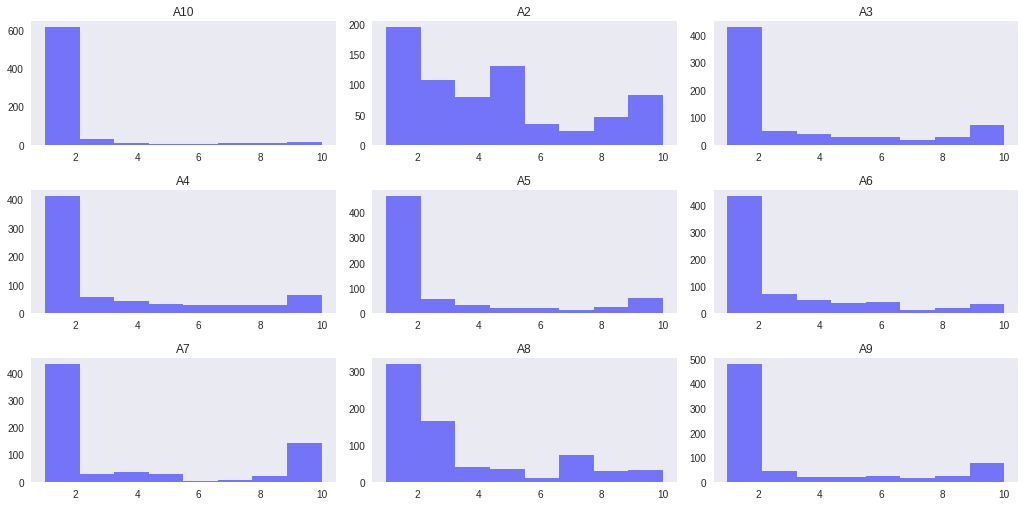

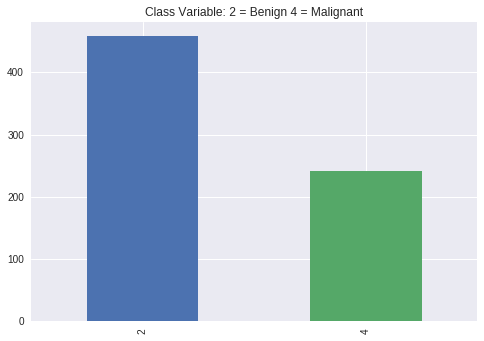

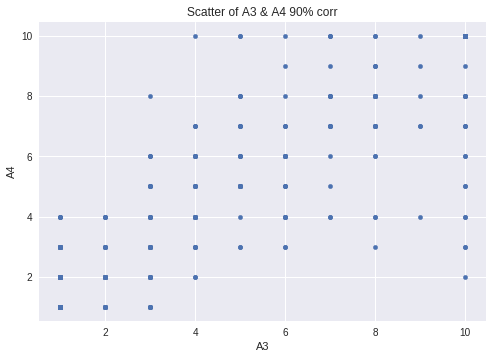

In [7]:
# Main Function
if __name__ == "__main__":
  df = load_data()
  df = clean_missing(df)
  sum_metrics(df)
  plot_graphs(df)

In [8]:
print("The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.")

The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.


In [9]:
# KMeans algorithm using 4 clusters and calculating centroids
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cancer = KMeans(n_clusters = 4)
cancer.fit(df.iloc[:,1:-1])
centroids = cancer.cluster_centers_
pd.DataFrame(centroids, columns = df.iloc[:,1:10].columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,7.234043,4.851064,5.042553,4.861702,4.117021,9.382979,5.265957,3.787234,1.648936
1,7.464789,7.028169,6.676056,4.197183,5.535211,3.453220,5.380282,6.816901,2.309859
2,2.944934,1.244493,1.365639,1.292952,2.039648,1.351401,2.061674,1.200441,1.077093
3,6.762500,8.387500,8.425000,7.750000,6.775000,9.212500,7.375000,7.737500,3.787500


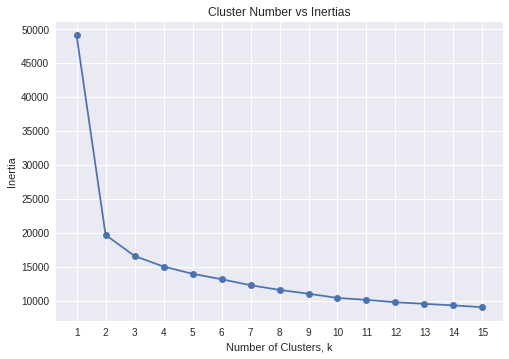

In [10]:
# Calculating Inertia 
ks = range(1,16)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(df.iloc[:,1:-1])
  inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.title('Cluster Number vs Inertias')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [0]:
# Based on the above plot, optimal number of clusters is 2

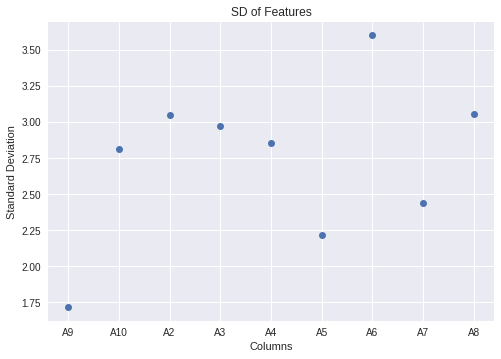

In [12]:
# Calculating Standard deviations of all features to inspect variation
SD = df.iloc[:,1:-1].std()
plt.plot(SD.sort_values(ascending = False),'o')
plt.title("SD of Features")
plt.xlabel("Columns")
plt.ylabel("Standard Deviation")
plt.xticks(df.iloc[:,1:-1].columns)
plt.show()

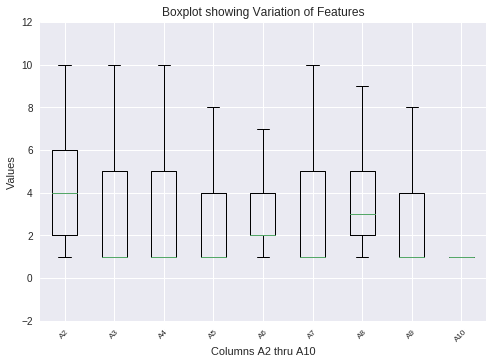

In [17]:
# Box plot showing variation of the columns A2:A10
data = []
for i in range(1, 10):
    data.append(df.iloc[:, i])

# Multiple box plots on one Axes
fig, ax = plt.subplots()
plt.title("Boxplot showing Variation of Features")
plt.xlabel("Columns A2 thru A10")
plt.ylabel("Values")
ax.boxplot(data, 0)
top = 12
bottom = -2
ax.set_ylim(bottom, top)
ax.set_xticklabels(df.iloc[:,1:-1].columns, rotation=45, fontsize=8)

plt.show()

In [14]:
# Cross tabulating the cluster labels with "Class"
labels = cancer.fit_predict(df.iloc[:,1:-1])
ctf = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
pd.crosstab(ctf['labels'], ctf['Class'])                  

Class,2,4
labels,,
0,7,64
1,0,80
2,444,10
3,7,87


In [15]:
# Implementing Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_init=20)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df.iloc[:,1:-1])

pd.DataFrame(pipeline.named_steps['kmeans'].cluster_centers_, columns = df.iloc[:,1:10].columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,-0.496223,-0.60690,-0.602092,-0.514917,-0.509713,-0.580600,-0.547702,-0.530778,-0.303758
1,0.986083,1.20602,1.196465,1.023233,1.012892,1.153757,1.088383,1.054751,0.603622


In [16]:
# Cross tabulating the labels against "Class" after stardardization
labels = pipeline.predict(df.iloc[:,1:-1])
ctf_s = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
pd.crosstab(ctf_s['labels'], ctf_s['Class'])                  

Class,2,4
labels,,
0,446,19
1,12,222
